# Examen Parcial II - CA417

## Jimena Chacón Chavarría

### Selección Única

1. b
2. c
3. d
4. b
5. b
6. b
7. b
8. c
9. c
10. a

### Pregunta 11

La función de exceso medio en riesgo operativo, es útil ya que permite la definición de un umbral c, a partir del cual se calcula la media de los excesos condicionada a que las pérdidas superen dicho umbral. En la naturaleza del riesgo operativo, las pérdidas extremas suelen ser comunes, y mediante esta función permiten hacerse modelaciones y administrar mejor este riesgo ya que se pueden tomar los eventos extremos después del umbral definida. Esta función facilita el ajuste de modelos estadísticos para extrapolar riesgos más allá de los datos observados, permitiendo estimar la probabilidad de eventos extremos con pérdidas significativas.

### Pregunta 12

El modelo propuesto se basa en asociar a cada deudor dos variables: $X_i$ que representa un valor, y $K_i$
un umbral. Con estas dos variables, se define una variable binaria $Y_i$, usualmente por medio de una dummy
​que toma el valor de 0 o 1. Se asume que existe una relación de dependencia entre los valores $X_i$ y los umbrales $K_i$.

La estructura del modelo comienza estableciendo un umbral que permite distinguir entre riesgos normales o predecibles (aquellos por debajo del umbral) y riesgos que presentan un comportamiento más extremo o agresivo (los que superan el umbral). A partir de esta clasificación, se desarrollan modelos específicos para cada tipo de riesgo. Los parámetros de estos modelos se ajustan utilizando datos históricos y aplicando métodos estadísticos apropiados.

### Pregunta 13

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score 

dfData = pd.read_csv('loan_sample.csv')

dfData = dfData[['delinq_2yrs','home_ownership', 'annual_inc','purpose','term']].copy()

In [91]:
dfData['Impago'] = dfData['delinq_2yrs']
data_loan= dfData[(dfData['purpose'] == 'house') | (dfData['purpose'] == 'home_improvement')]
data_loan

,delinq_2yrs,home_ownership,annual_inc,purpose,term,Impago
11,0.0,OWN,55000.0,home_improvement,36 months,0.0
37,1.0,MORTGAGE,89000.0,home_improvement,36 months,1.0
38,0.0,OWN,65000.0,home_improvement,60 months,0.0
39,0.0,OWN,67500.0,house,36 months,0.0
40,1.0,MORTGAGE,30000.0,home_improvement,36 months,1.0
...,...,...,...,...,...,...
99935,0.0,RENT,69123.0,house,36 months,0.0
99946,0.0,MORTGAGE,165000.0,home_improvement,36 months,0.0
99950,0.0,OWN,250000.0,home_improvement,36 months,0.0
99952,0.0,OWN,36000.0,home_improvement,36 months,0.0


In [92]:
data_loan['annual_inc'] = pd.to_numeric(data_loan['annual_inc'],errors='coerce')
data_loan['annual_inc'].isna().sum()

/tmp/ipykernel_5931/914271577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loan['annual_inc'] = pd.to_numeric(data_loan['annual_inc'],errors='coerce')


np.int64(0)

### Variable dependiente

In [93]:
data_loan['delinq_2yrs'].unique()
data_loan['delinq_2yrs'].value_counts()
data_loan['malo'] = data_loan['delinq_2yrs'].apply(lambda x: 1 if x > 0 else 0)
data_loan['malo'].value_counts()

/tmp/ipykernel_5931/3533547517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_loan['malo'] = data_loan['delinq_2yrs'].apply(lambda x: 1 if x > 0 else 0)


malo
0    4967
1    1418
Name: count, dtype: int64

### Variables independientes

In [94]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

data_loan2, data_test = train_test_split(data_loan, test_size = 0.25, random_state=42)

Annual Income

In [95]:
cuantial_al_10 = data_loan2['annual_inc'].quantile(.10)
cuantil_al_90 = data_loan2['annual_inc'].quantile(.90)
data_loan2 = data_loan2.loc[(data_loan2['annual_inc']<=cuantil_al_90)&(data_loan2['annual_inc']>=cuantial_al_10),:].copy()

data_loan2['Annual_IncomeCat'], binsAnIn = pd.cut(data_loan2['annual_inc'],bins = 5, retbins=True)
data_loan2['Annual_IncomeCat'].value_counts()

Annual_IncomeCat
(38772.884, 61107.2]    1329
(61107.2, 83330.4]      1082
(83330.4, 105553.6]      750
(105553.6, 127776.8]     436
(127776.8, 150000.0]     287
Name: count, dtype: int64

In [96]:
dfTablaWoeIngresoAn = data_loan2[['Annual_IncomeCat','malo']].groupby('Annual_IncomeCat').agg({'malo':['sum','count']})
dfTablaWoeIngresoAn.columns = ['malo','total']
dfTablaWoeIngresoAn['probMalo'] = dfTablaWoeIngresoAn['malo'] / dfTablaWoeIngresoAn['total']
dfTablaWoeIngresoAn

/tmp/ipykernel_5931/1322053600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfTablaWoeIngresoAn = data_loan2[['Annual_IncomeCat','malo']].groupby('Annual_IncomeCat').agg({'malo':['sum','count']})


,malo,total,probMalo
Annual_IncomeCat,,,
"(38772.884, 61107.2]",243,1329,0.182844
"(61107.2, 83330.4]",270,1082,0.249538
"(83330.4, 105553.6]",186,750,0.248000
"(105553.6, 127776.8]",101,436,0.231651
"(127776.8, 150000.0]",84,287,0.292683


In [97]:
dfTablaWoeIngresoAn.index = dfTablaWoeIngresoAn.index.astype(str)


In [98]:
dfCountAnnual_IncomeCat=data_loan2['Annual_IncomeCat'].value_counts().sort_index()
dfCountAnnual_IncomeCat

Annual_IncomeCat
(38772.884, 61107.2]    1329
(61107.2, 83330.4]      1082
(83330.4, 105553.6]      750
(105553.6, 127776.8]     436
(127776.8, 150000.0]     287
Name: count, dtype: int64

In [99]:
dfTablaWoeIngresoAn['bueno'] = dfTablaWoeIngresoAn['total']-dfTablaWoeIngresoAn['malo']
dfTablaWoeIngresoAn['distBad'] = dfTablaWoeIngresoAn['malo'] / dfTablaWoeIngresoAn['malo'].sum() 
dfTablaWoeIngresoAn['distGood'] = dfTablaWoeIngresoAn['bueno'] / dfTablaWoeIngresoAn['bueno'].sum()
dfTablaWoeIngresoAn['woe_IngAn'] = np.log(dfTablaWoeIngresoAn['distBad']/dfTablaWoeIngresoAn['distGood'])

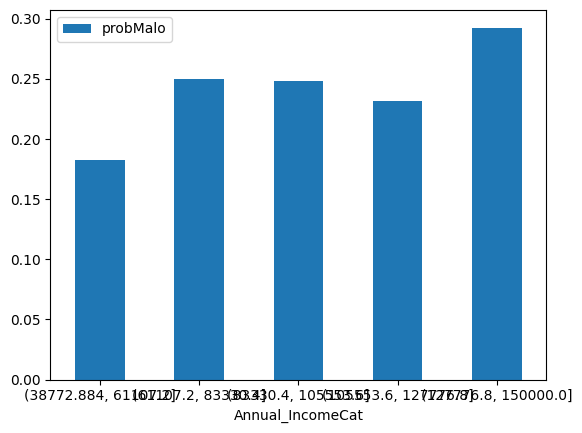

In [100]:
ax = dfTablaWoeIngresoAn.plot.bar(y='probMalo', rot=0)

<Axes: xlabel='Annual_IncomeCat'>

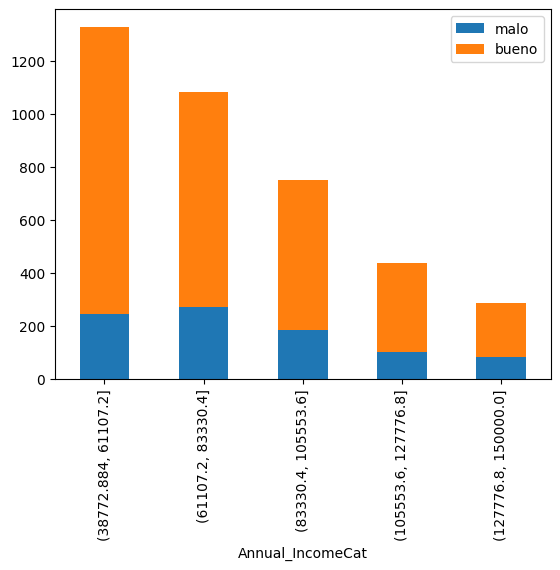

In [101]:
dfTablaWoeIngresoAn[['malo','bueno']].plot.bar(stacked=True)

In [102]:
information_value_IngreAnual = (dfTablaWoeIngresoAn['woe_IngAn'] *(dfTablaWoeIngresoAn['distBad'] -dfTablaWoeIngresoAn['distGood'] )).sum()
information_value_IngreAnual

np.float64(0.040051696952288454)

In [103]:
contingencia_AnIn = dfTablaWoeIngresoAn[['malo','bueno']]
contingencia_AnIn

,malo,bueno
Annual_IncomeCat,,
"(38772.884, 61107.2]",243,1086
"(61107.2, 83330.4]",270,812
"(83330.4, 105553.6]",186,564
"(105553.6, 127776.8]",101,335
"(127776.8, 150000.0]",84,203


In [104]:
from scipy.stats import chi2_contingency
res_IngreAnual = chi2_contingency(contingencia_AnIn)
res_IngreAnual

Chi2ContingencyResult(statistic=np.float64(26.836258179546935), pvalue=np.float64(2.145307190574155e-05), dof=4, expected_freq=array([[ 302.48094748, 1026.51905252],
       [ 246.26364573,  835.73635427],
       [ 170.70030896,  579.29969104],
       [  99.23377961,  336.76622039],
       [  65.32131823,  221.67868177]]))

In [105]:
dfTablaWoeIngresoAn.reset_index(inplace=True)
data_loan2['Annual_IncomeCat'] = data_loan2['Annual_IncomeCat'].astype(str)

In [106]:
data_loan2 = pd.merge(data_loan2,dfTablaWoeIngresoAn[['Annual_IncomeCat','woe_IngAn']],on='Annual_IncomeCat')

In [107]:
data_loan2['Annual_IncomeCat'].value_counts()

Annual_IncomeCat
(38772.884, 61107.2]    1329
(61107.2, 83330.4]      1082
(83330.4, 105553.6]      750
(105553.6, 127776.8]     436
(127776.8, 150000.0]     287
Name: count, dtype: int64

Home Ownership

In [108]:
dfTablaWoeHome = data_loan2[['home_ownership','malo']].groupby('home_ownership').agg({'malo':['sum','count']})
dfTablaWoeHome.columns = ['malo','total']
dfTablaWoeHome['probMalo'] = dfTablaWoeHome['malo'] / dfTablaWoeHome['total']

dfTablaWoeHome['bueno'] = dfTablaWoeHome['total']-dfTablaWoeHome['malo']
dfTablaWoeHome['distBad'] = dfTablaWoeHome['malo'] / dfTablaWoeHome['malo'].sum() 
dfTablaWoeHome['distGood'] = dfTablaWoeHome['bueno'] / dfTablaWoeHome['bueno'].sum()
dfTablaWoeHome['woe_home'] = np.log(dfTablaWoeHome['distBad']/dfTablaWoeHome['distGood'])
dfTablaWoeHome

,malo,total,probMalo,bueno,distBad,distGood,woe_home
home_ownership,,,,,,,
MORTGAGE,687,2940,0.233673,2253,0.777149,0.751000,0.034227
OWN,131,564,0.232270,433,0.148190,0.144333,0.026370
RENT,66,380,0.173684,314,0.074661,0.104667,-0.337828


In [109]:
dfTablaWoeHome.reset_index(inplace=True)
dfTablaWoeHome.index = dfTablaWoeHome.index.astype(str)
data_loan2['home_ownership'] = data_loan2['home_ownership'].astype(str)
data_loan2 = pd.merge(data_loan2,dfTablaWoeHome[['home_ownership','woe_home']],on='home_ownership')

In [110]:
import statsmodels.formula.api as smf
model_train = smf.logit('malo ~ woe_IngAn + woe_home', data= data_loan2).fit()
print(model_train.summary())

Optimization terminated successfully.
         Current function value: 0.532115
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   malo   No. Observations:                 3884
Model:                          Logit   Df Residuals:                     3881
Method:                           MLE   Df Model:                            2
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                0.007916
Time:                        00:12:39   Log-Likelihood:                -2066.7
converged:                       True   LL-Null:                       -2083.2
Covariance Type:            nonrobust   LLR p-value:                 6.882e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2219      0.039    -31.733      0.000      -1.297      -1.146
woe_IngAn      0.9742      0.

In [111]:
data_test['Annual_IncomeCat'] = pd.cut(data_test['annual_inc'], bins=binsAnIn, right=True)
data_test['Annual_IncomeCat'] = data_test['Annual_IncomeCat'].astype(str)
data_test = pd.merge(data_test,dfTablaWoeIngresoAn[['Annual_IncomeCat','woe_IngAn']],on='Annual_IncomeCat')

data_test['home_ownership'] = data_test['home_ownership'].astype(str)
data_test = pd.merge(data_test,dfTablaWoeHome[['home_ownership','woe_home']],on='home_ownership')


data_test

,delinq_2yrs,home_ownership,annual_inc,purpose,term,Impago,malo,Annual_IncomeCat,woe_IngAn,woe_home
0,0.0,MORTGAGE,125000.0,home_improvement,60 months,0.0,0,"(105553.6, 127776.8]",0.022900,0.034227
1,0.0,MORTGAGE,150000.0,home_improvement,60 months,0.0,0,"(127776.8, 150000.0]",0.339521,0.034227
2,0.0,MORTGAGE,120000.0,home_improvement,60 months,0.0,0,"(105553.6, 127776.8]",0.022900,0.034227
3,2.0,MORTGAGE,102000.0,home_improvement,36 months,2.0,1,"(83330.4, 105553.6]",0.112603,0.034227
4,0.0,MORTGAGE,73000.0,home_improvement,60 months,0.0,0,"(61107.2, 83330.4]",0.120832,0.034227
...,...,...,...,...,...,...,...,...,...,...
1289,0.0,MORTGAGE,107000.0,home_improvement,60 months,0.0,0,"(105553.6, 127776.8]",0.022900,0.034227
1290,0.0,MORTGAGE,70000.0,home_improvement,60 months,0.0,0,"(61107.2, 83330.4]",0.120832,0.034227
1291,0.0,MORTGAGE,65000.0,home_improvement,36 months,0.0,0,"(61107.2, 83330.4]",0.120832,0.034227
1292,0.0,OWN,53000.0,home_improvement,60 months,0.0,0,"(38772.884, 61107.2]",-0.275285,0.026370


In [127]:
corte = .3
y_pred = model_train.predict(data_test) > corte
y_test = data_test['malo']
sum(y_pred)

0

In [128]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 77.90%
Confusion Matrix:
 [[1008    0]
 [ 286    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1008
           1       0.00      0.00      0.00       286

    accuracy                           0.78      1294
   macro avg       0.39      0.50      0.44      1294
weighted avg       0.61      0.78      0.68      1294



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [116]:
y_prob = model_train.predict(data_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

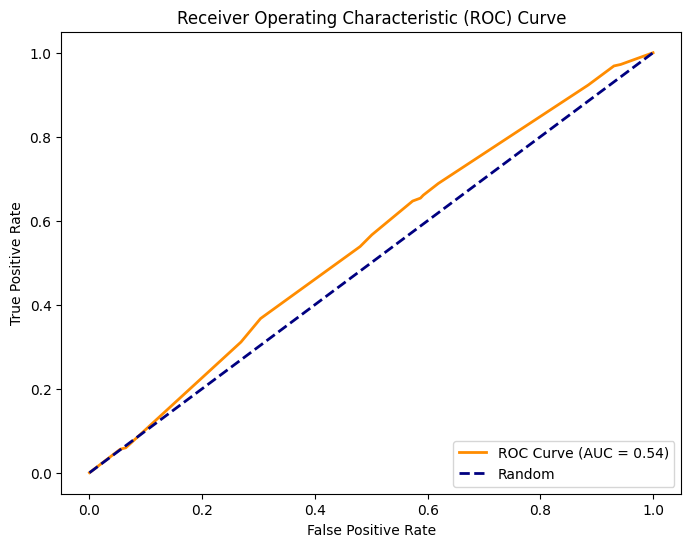

In [130]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [131]:
roc_auc

np.float64(0.543243215118215)

In [132]:
gini = 2*roc_auc-1
gini

np.float64(0.0864864302364301)

### Ejercicio 14

In [134]:
data_perdidas = pd.read_csv('perdidas.csv',sep = ',')
data_perdidas

,Unnamed: 0,Fecha,Monto
0,0,2010-01-01,1.611220e+06
1,1,2010-01-03,4.805363e+06
2,2,2010-01-06,3.009076e+05
3,3,2010-01-07,6.880461e+05
4,4,2010-01-08,1.669404e+06
...,...,...,...
1096,1096,2014-03-15,1.858579e+05
1097,1097,2014-03-16,4.544246e+05
1098,1098,2014-03-17,4.639341e+06
1099,1099,2014-03-20,3.592726e+05


In [136]:
data_perdidas['Fecha'].dtype

dtype('O')

In [142]:
data_perdidas['Fecha'] = pd.to_datetime(data_perdidas['Fecha'], format="%Y-%m-%d")
data_perdidas['Fecha'].dtype

dtype('<M8[ns]')

In [145]:
dfrec = data_perdidas.groupby('Fecha').agg(['sum','count'])
dfrec.columns = [''.join(col).strip() for col in dfrec.columns.values]
dfrec

,Unnamed: 0sum,Unnamed: 0count,Montosum,Montocount
Fecha,,,,
2010-01-01,0,1,1.611220e+06,1
2010-01-03,1,1,4.805363e+06,1
2010-01-06,2,1,3.009076e+05,1
2010-01-07,3,1,6.880461e+05,1
2010-01-08,4,1,1.669404e+06,1
...,...,...,...,...
2014-03-15,1096,1,1.858579e+05,1
2014-03-16,1097,1,4.544246e+05,1
2014-03-17,1098,1,4.639341e+06,1


In [147]:
data_perdidas['Fecha1'] = data_perdidas['Fecha'].dt.to_period('M').dt.to_timestamp()
data_perdidas['Fecha1']

0      2010-01-01
1      2010-01-01
2      2010-01-01
3      2010-01-01
4      2010-01-01
          ...    
1096   2014-03-01
1097   2014-03-01
1098   2014-03-01
1099   2014-03-01
1100   2014-03-01
Name: Fecha1, Length: 1101, dtype: datetime64[ns]

In [151]:
dfrec_month = data_perdidas[['Fecha1','Monto']].groupby(['Fecha1']).agg(['sum','count']).reset_index()
dfrec_month.columns = [''.join(col).strip() for col in dfrec_month.columns.values]

dfrec_month.head()

,Fecha1,Montosum,Montocount
0,2010-01-01,2.079054e+07,22
1,2010-02-01,1.505359e+08,23
2,2010-03-01,4.637056e+11,23
3,2010-04-01,1.741951e+08,24
4,2010-05-01,2.019801e+08,15


In [152]:
fFechaInicial = dfrec.index.min()
fFechaFinal = dfrec.index.max()
fFechas = pd.date_range(start = fFechaInicial, end = fFechaFinal, freq = 'MS')
fFechas

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01',
               '2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01'],
              dtype='datetime64[ns]', freq='MS')

In [154]:
df_meses_todos = pd.DataFrame( data = {'Fecha1':fFechas} )
df_data_freq = df_meses_todos.merge(dfrec_month, how = 'left').fillna(0)

df_data_freq.head()

,Fecha1,Montosum,Montocount
0,2010-01-01,2.079054e+07,22
1,2010-02-01,1.505359e+08,23
2,2010-03-01,4.637056e+11,23
3,2010-04-01,1.741951e+08,24
4,2010-05-01,2.019801e+08,15


In [157]:
df_data_freq['Montosum'].mean()

np.float64(9789342806.606161)

In [159]:
df_data_freq['Montocount'].mean()

np.float64(21.58823529411765)

### Frecuencia

In [163]:
import scipy.stats as st 
mu = df_data_freq['Montocount'].mean()
sigma = df_data_freq['Montocount'].std()
nmin = df_data_freq['Montocount'].min()
nmax = df_data_freq['Montocount'].max()

In [164]:
st.geom.numargs

1

In [167]:
maxdata = df_data_freq['Montocount'].max() + 10
pmf,x = np.histogram(df_data_freq['Montocount'],bins = range(0,maxdata), density = True)
x = x[:-1]

In [168]:
pmf.sum()

np.float64(1.0)

In [169]:
dist_discreta = [st.nbinom]
cotas_discreta = [[(0,maxdata),(0,1)]]

In [171]:
df_data_freq['Montocount'].head()

0    22
1    23
2    23
3    24
4    15
Name: Montocount, dtype: int64

In [173]:
df_data_freq['Montocount'].value_counts()

Montocount
23    10
22     8
20     6
21     5
25     5
17     3
18     3
28     2
19     2
24     2
15     1
27     1
26     1
16     1
14     1
Name: count, dtype: int64

In [174]:
X = range(nmin,nmax)
X

range(14, 28)

(array([ 1.,  1.,  1.,  3.,  3.,  2.,  6.,  5.,  8., 10.,  2.,  5.,  1.,
         3.]),
 array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28.]),
 <BarContainer object of 14 artists>)

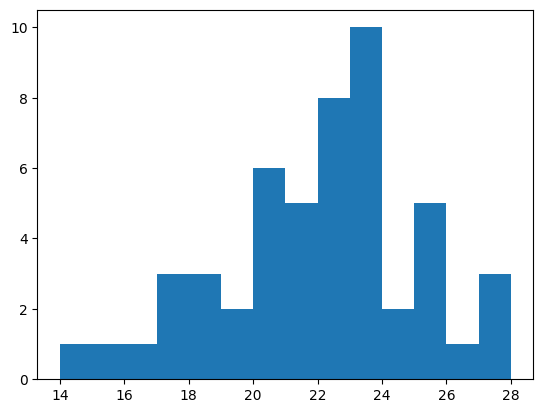

In [176]:
plt.hist(df_data_freq['Montocount'], bins=len(X)) 

In [177]:
best_sse = np.inf

In [179]:
st.fit(st.poisson,df_data_freq['Montocount'].values, bounds = [(0,100)])

  params: FitParams(mu=np.float64(21.588237104516757), loc=np.float64(0.0))
 success: True
 message: 'Optimization terminated successfully.'

In [181]:
for id in range(len(dist_discreta)):

    print(dist_discreta[id])
    nparams = dist_discreta[id].numargs
    params = st.fit(dist_discreta[id],df_data_freq['Montocount'].values, bounds = cotas_discreta[id])
    print(params)
    
    yt = dist_discreta[id].pmf(x,*params.params)
    
    sse = np.sum(np.power(pmf-yt, 2))
    print(sse)
    
    if best_sse > sse:
        best_freq_distribution = dist_discreta[id]
        best_freq_params = params.params
        best_freq_sse = sse
        best_freq_pmf = yt


  params: FitParams(n=np.float64(38.0), p=np.float64(0.6382930371620639), loc=np.float64(0.0))
 success: True
 message: 'Optimization terminated successfully.'
0.03787960024420311


In [183]:
best_freq_distribution

In [184]:
best_freq_distribution.mean(*best_freq_params)

np.float64(21.53378430846289)

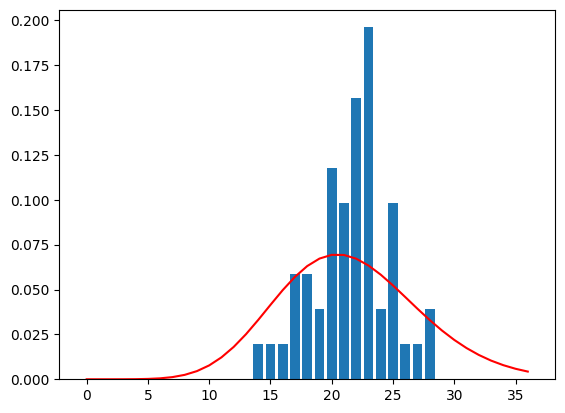

In [182]:
fi,ax = plt.subplots()
ax.bar(x,pmf)
ax.plot(x,best_freq_pmf, color = 'red')

### Severidad

In [185]:
cont_dist = ['gamma']
data_perdidas['Monto'].sum()

np.float64(499256483136.91406)

In [187]:
bins = 200
maxmonto = data_perdidas['Monto'].max() * 1.1
prob,x = np.histogram(data_perdidas['Monto'],bins = np.linspace(0,maxmonto,bins), density = True)
x = x[:-1]
prob = prob/prob.sum()

In [188]:
best_sse = np.inf

In [195]:
for distribution in cont_dist:

    print(distribution)
    distribution = getattr(st, distribution)

    params = distribution.fit(data_perdidas['Monto'],  method="MM")
    
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    yt = distribution.pdf(x, loc=loc, scale=scale, *arg)
    yt = yt/yt.sum()
    sse = np.sum(np.power(yt - prob, 2.0))
    print(sse)

    if best_sse > sse > 0:
        best_distribution = distribution
        best_params = params
        best_sse = sse
        best_prob = yt

gamma
0.16489367062448296


In [199]:
yt.sum()

np.float64(0.9999999999999998)

In [196]:
best_distribution

In [197]:
arg = best_params[:-2]
loc = best_params[-2]
scale = best_params[-1]

In [198]:
best_distribution.mean(loc=loc, scale=scale, *arg)

np.float64(453457296.21881384)

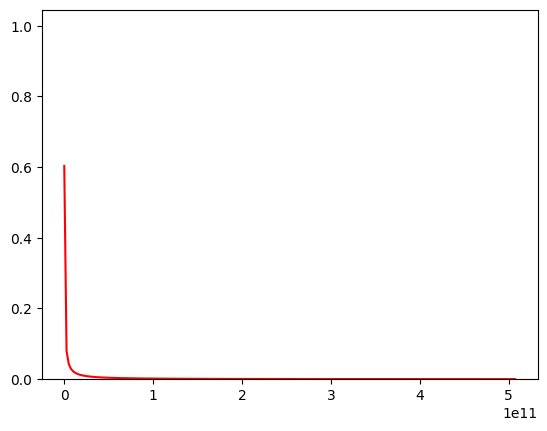

In [200]:
fi,ax = plt.subplots()
ax.bar(x,prob)
ax.plot(x,best_prob, color = 'red')

In [222]:
cont_dist = ['gamma']


In [223]:
import warnings

In [224]:
best_sse = np.inf

In [225]:
yt.sum()

np.float64(0.9999999999999998)

In [226]:
for distribution in cont_dist:
    print(distribution)
    try:
        distribution = getattr(st, distribution)
        with warnings.catch_warnings():

            warnings.filterwarnings('ignore')

            params = distribution.fit(data_perdidas['Monto'],  method="MM")
    
            arg = params[:-2]
            loc = params[-2]
            scale = params[-1]
        
            yt = distribution.pdf(x, loc=loc, scale=scale, *arg)
            yt = yt/yt.sum()
            sse = np.sum(np.power(yt - prob, 2.0))
            print(sse)
    
            if best_sse > sse > 0:
                best_distribution = distribution
                best_params = params
                best_sse = sse
                best_prob = yt
                
    except  Exception as e:
        print(e)
        print('Error')
        pass

gamma
0.16489367062448296


In [227]:
best_distribution

In [228]:
arg = best_params[:-2]
loc = best_params[-2]
scale = best_params[-1]

In [229]:
arg

(np.float64(0.0036503925052412526),)

In [230]:
scale

np.float64(231204031103.1584)

In [231]:
best_distribution.mean(loc=loc, scale=scale, *arg)

np.float64(453457296.21881384)

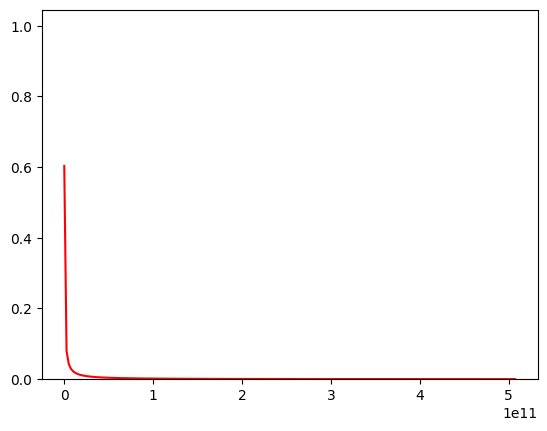

In [232]:
fi,ax = plt.subplots()
ax.bar(x,prob)
ax.plot(x,best_prob, color = 'red')

In [233]:
arg = best_params[:-2]
loc = best_params[-2]
scale = best_params[-1]

In [234]:
best_distribution.rvs(*arg, loc=loc, scale=scale, size = 10)

array([-3.90528166e+08, -3.90528166e+08, -2.15469942e+08, -3.90528166e+08,
       -3.90528166e+08, -3.90528166e+08, -3.90528166e+08, -3.90528166e+08,
       -3.90528166e+08, -3.90528166e+08])

In [235]:
num_esc = 3000

In [236]:
esc_perdidas = list()
n_val = list()
for ie in range(0,num_esc):
    N = best_freq_distribution.rvs(*best_freq_params,size=1)
    X = best_distribution.rvs(*arg, loc=loc, scale=scale, size = N)
    n_val.append(N)
    esc_perdidas.append(X.sum())

In [237]:
np.mean(n_val)

np.float64(21.721666666666668)

In [238]:
np.mean(esc_perdidas)

np.float64(11597871960.57707)

In [239]:
var = np.quantile(esc_perdidas,.99)
var

np.float64(329589144966.30927)

((array([-3.22522735, -2.96211872, -2.81542821, ...,  2.81542821,
          2.96211872,  3.22522735]),
  array([2.17992664e+04, 2.26492325e+04, 2.34369488e+04, ...,
         6.70296630e+09, 8.19808286e+09, 4.63594580e+11])),
 (np.float64(1447674107.5651138),
  np.float64(453457296.21881413),
  np.float64(0.10337012267958878)))

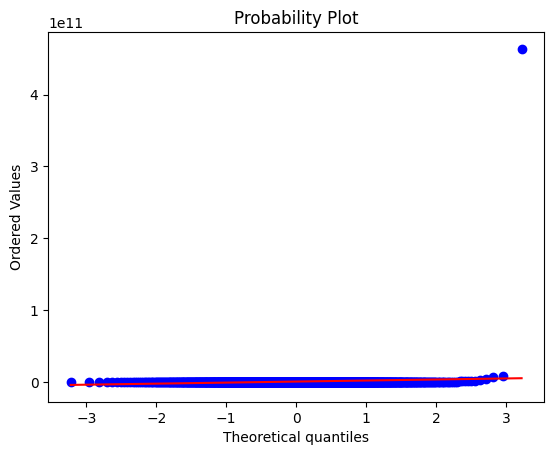

In [240]:
st.probplot(data_perdidas['Monto'], plot = plt)

((array([-3.90528166e+08, -3.90528166e+08, -3.90528166e+08, ...,
          9.72738610e+10,  1.48207233e+11,  2.65370239e+11]),
  array([2.17992664e+04, 2.26492325e+04, 2.34369488e+04, ...,
         6.70296630e+09, 8.19808286e+09, 4.63594580e+11])),
 (np.float64(1.1187596172463885),
  np.float64(92806353.90536708),
  np.float64(0.8078066324364241)))

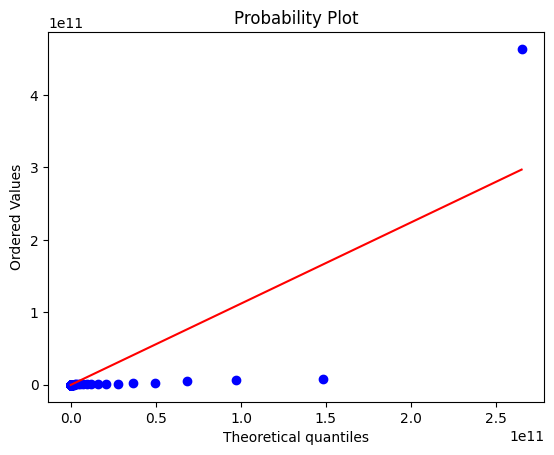

In [241]:
st.probplot(data_perdidas['Monto'], dist = best_distribution(*arg, loc=loc, scale=scale), plot = plt)